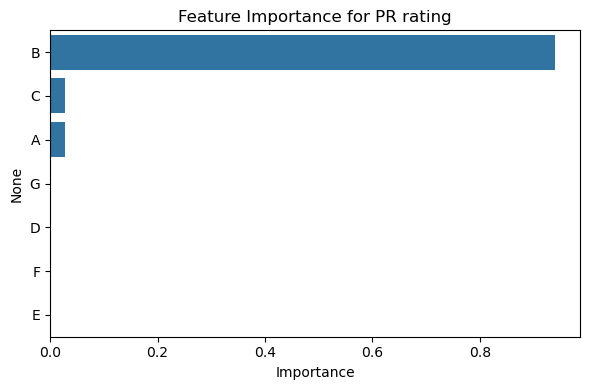

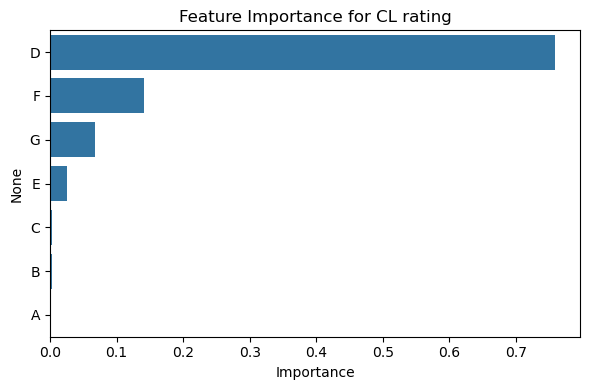

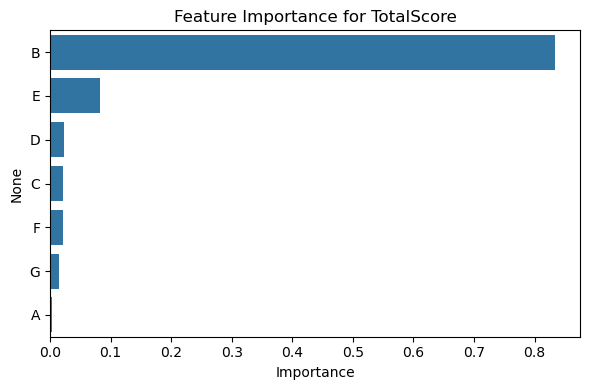


📊 Feature Importance Table:
   PR rating  CL rating  TotalScore
A      0.027      0.001       0.003
B      0.939      0.003       0.833
C      0.029      0.003       0.022
D      0.001      0.758       0.024
E      0.001      0.026       0.082
F      0.001      0.142       0.022
G      0.002      0.067       0.014


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Load the cleaned dataset
df = pd.read_csv("freedom_cleaned.csv")

# Define features and targets
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
targets = ['PR rating', 'CL rating', 'TotalScore']

# Store importances
importance_dict = {}

# Loop through each target
for target in targets:
    X = df[features]
    y = df[target]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Extract importance and store
    importances = model.feature_importances_
    importance_dict[target] = pd.Series(importances, index=features).sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=importance_dict[target].values, y=importance_dict[target].index)
    plt.title(f"Feature Importance for {target}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# Combine into DataFrame for comparison
importance_df = pd.DataFrame(importance_dict).round(3)
print("\n📊 Feature Importance Table:")
print(importance_df)
